In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ML/auto.csv')

dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
dataset.drop(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'curb-weight', 'engine-type', 'num-of-cylinders', ' engine-size', 'fuel-system', 'horsepower', 'city-mpg', 'highway-mpg'], axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   bore               205 non-null    object 
 5   stroke             205 non-null    object 
 6   compression-ratio  205 non-null    float64
 7   peak-rpm           205 non-null    object 
 8   price              205 non-null    object 
dtypes: float64(5), object(4)
memory usage: 14.5+ KB


In [ ]:
dataset.replace('?', np.nan, inplace=True)

In [ ]:
print(dataset.isnull().sum().sort_values())

wheel-base           0
length               0
width                0
height               0
compression-ratio    0
peak-rpm             2
bore                 4
stroke               4
price                4
dtype: int64


In [ ]:
bore_mean = dataset['bore'].astype(float).mean(axis=0)
stroke_mean = dataset['stroke'].astype(float).mean(axis=0)
peak_mean = dataset['peak-rpm'].astype(float).mean(axis=0)

In [ ]:
dataset['stroke'].replace(np.nan, stroke_mean, inplace=True)
dataset['bore'].replace(np.nan, bore_mean, inplace=True)
dataset['peak-rpm'].replace(np.nan, peak_mean, inplace=True)

dataset.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450


In [ ]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                4
dtype: int64

In [ ]:
#Untuk kolom price akan di dropna
dataset.dropna(subset=['price'], axis=0, inplace=True)
print(dataset.isnull().sum().sort_values())
dataset.head()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                0
dtype: int64


,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450


In [ ]:
#Lakukan casting dataset
dataset[['bore', 'stroke', 'price', 'peak-rpm']] = dataset[['bore', 'stroke', 'price', 'peak-rpm']].astype('float')

dataset.dtypes

wheel-base           float64
length               float64
width                float64
height               float64
bore                 float64
stroke               float64
compression-ratio    float64
peak-rpm             float64
price                float64
dtype: object

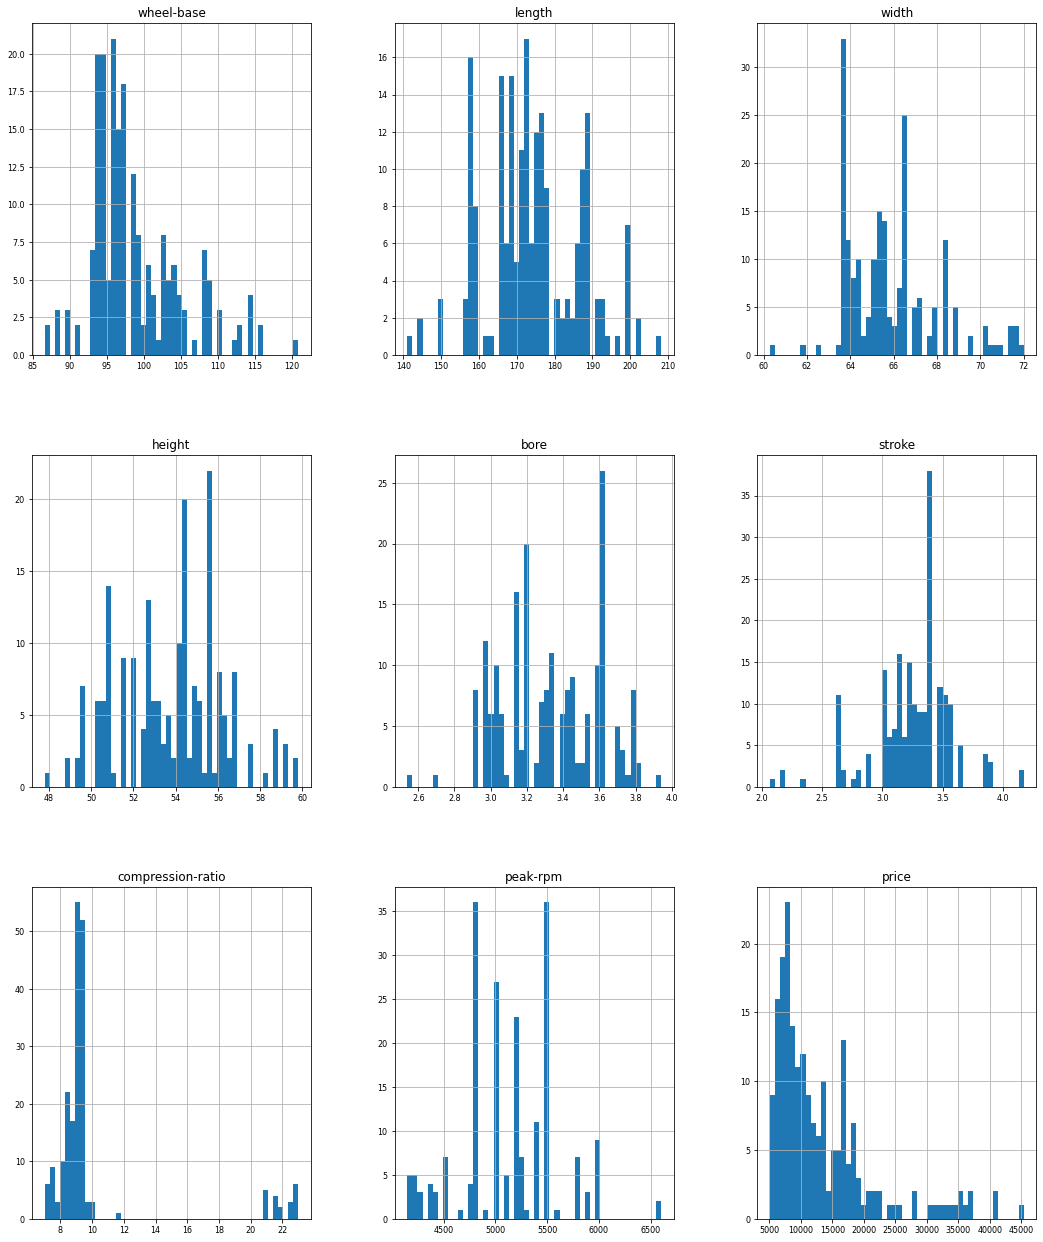

In [ ]:
dataset_numbers = dataset.select_dtypes(include=['float64'])

dataset_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [ ]:
corr = dataset.corr()

corr

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
wheel-base,1.000000,0.876024,0.814507,0.590742,0.493244,0.158018,0.250313,-0.360305,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.608971,0.123952,0.159733,-0.285970,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.544885,0.188822,0.189867,-0.245800,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.180449,-0.060663,0.259737,-0.309974,0.135486
bore,0.493244,0.608971,0.544885,0.180449,1.000000,-0.055390,0.001263,-0.267392,0.543155
stroke,0.158018,0.123952,0.188822,-0.060663,-0.055390,1.000000,0.187871,-0.063561,0.082269
compression-ratio,0.250313,0.159733,0.189867,0.259737,0.001263,0.187871,1.000000,-0.435780,0.071107
peak-rpm,-0.360305,-0.285970,-0.245800,-0.309974,-0.267392,-0.063561,-0.435780,1.000000,-0.101616
price,0.584642,0.690628,0.751265,0.135486,0.543155,0.082269,0.071107,-0.101616,1.000000


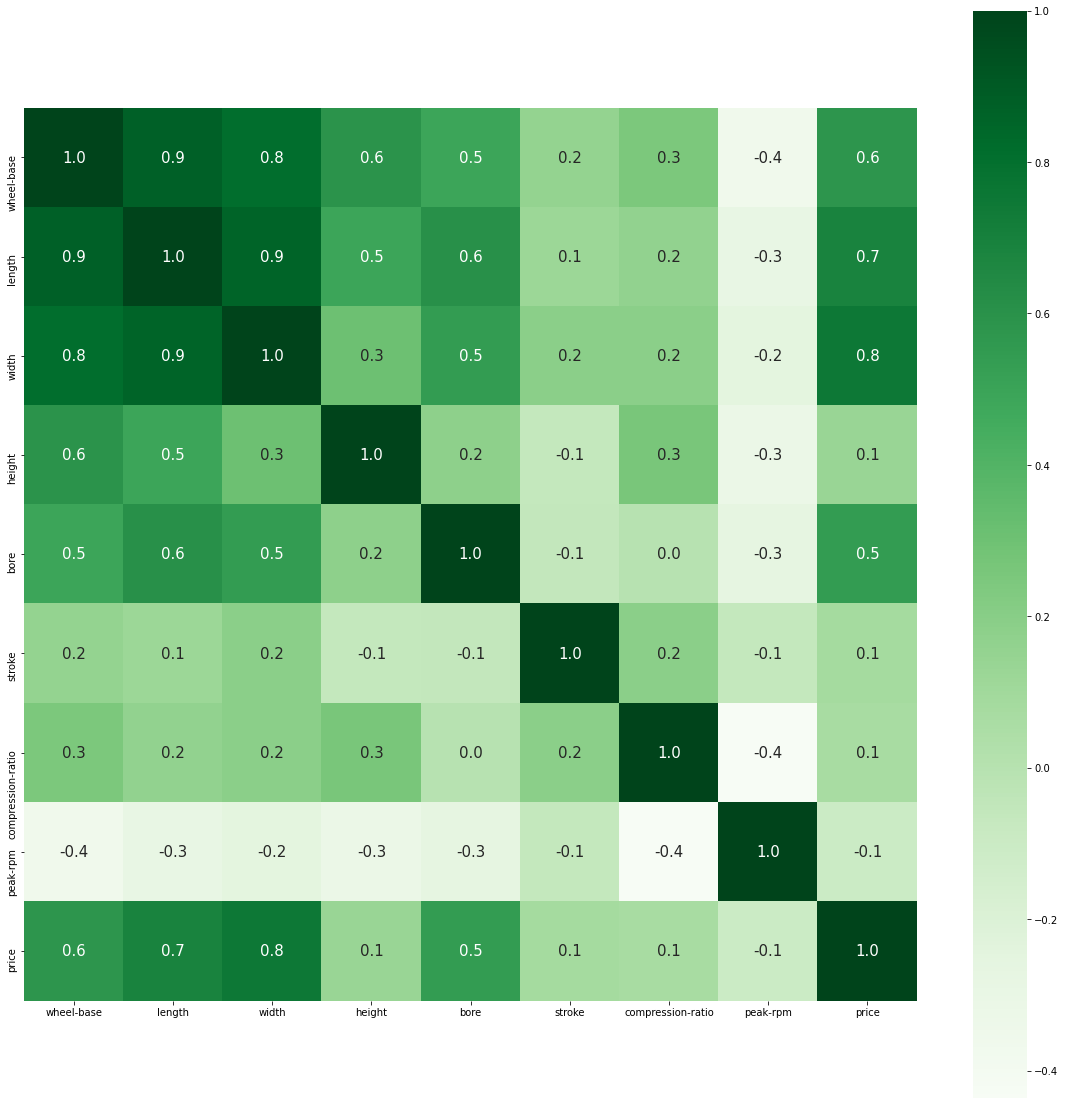

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Linear Regression

### Feature Engineering

In [ ]:
label = dataset['price']
feature = dataset.drop(['price'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

feature = scaler.fit_transform(feature.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.244769250439587
MAE (Mean Absolute Error) 0.37372756360580484
r^2 score 0.6582019578480833
RMSE (Root Mean Squared Error 0.49474159966550924


### Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 7ms/step - loss: 1.0309 - val_loss: 0.7003
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9704 - val_loss: 0.6764
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8886 - val_loss: 0.6510
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8037 - val_loss: 0.6228
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7111 - val_loss: 0.5994
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6292 - val_loss: 0.5755
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5727 - val_loss: 0.5568
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5282 - val_loss: 0.5419
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4986 - val_loss: 0.5224
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4754 - val_loss: 0.5064
Epoch 11/50
20/20 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.27547593186445724
MAE (Mean Absolute Error) 0.40696487011195326
r^2 score 0.6153228642807574
RMSE (Root Mean Squared Error 0.5248580111463073


## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 7ms/step - loss: 1.0695 - val_loss: 0.7186
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0634 - val_loss: 0.7133
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0486 - val_loss: 0.7029
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0232 - val_loss: 0.6842
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9745 - val_loss: 0.6534
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9022 - val_loss: 0.6070
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8024 - val_loss: 0.5506
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7028 - val_loss: 0.4960
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5935 - val_loss: 0.4531
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5142 - val_loss: 0.4223
Epoch 11/50
20/20 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.16112421281766906
MAE (Mean Absolute Error) 0.291064161357015
r^2 score 0.7750046609799106
RMSE (Root Mean Squared Error 0.40140280619057594


### Wider model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0626 - val_loss: 0.7066
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0274 - val_loss: 0.6821
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9704 - val_loss: 0.6433
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8831 - val_loss: 0.5899
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7691 - val_loss: 0.5320
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6552 - val_loss: 0.4881
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5687 - val_loss: 0.4673
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5017 - val_loss: 0.4527
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4695 - val_loss: 0.4440
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4443 - val_loss: 0.4301
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.18932106670405358
MAE (Mean Absolute Error) 0.3219633023080631
r^2 score 0.7356303137696241
RMSE (Root Mean Squared Error 0.43511040748763247


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,1.062630,0.706604,0
1,1.027430,0.682131,1
2,0.970443,0.643313,2
3,0.883109,0.589865,3
4,0.769129,0.531967,4
...,...,...,...
95,0.179964,0.188040,95
96,0.181942,0.188503,96
97,0.181808,0.189642,97
98,0.176875,0.189298,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
77,0.195991,0.186854,77
81,0.192124,0.186989,81
80,0.194898,0.187102,80
83,0.191300,0.187348,83
68,0.206058,0.187383,68
...,...,...,...
4,0.769129,0.531967,4
3,0.883109,0.589865,3
2,0.970443,0.643313,2
1,1.027430,0.682131,1


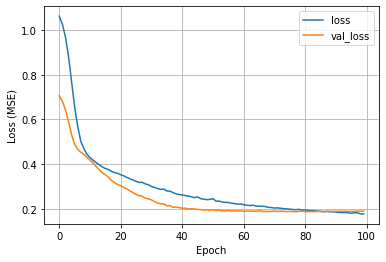

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0762 - val_loss: 0.7013
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0438 - val_loss: 0.6793
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0085 - val_loss: 0.6524
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9568 - val_loss: 0.6161
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8930 - val_loss: 0.5698
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8023 - val_loss: 0.5131
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6874 - val_loss: 0.4567
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5862 - val_loss: 0.4104
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4968 - val_loss: 0.3878
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4535 - val_loss: 0.3749
Epoch 11/

In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
83,0.182400,0.161575,83
99,0.168879,0.162169,99
79,0.188191,0.162229,79
90,0.175942,0.162357,90
81,0.185633,0.162381,81
...,...,...,...
4,0.893005,0.569849,4
3,0.956793,0.616143,3
2,1.008496,0.652372,2
1,1.043750,0.679308,1


In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 1.0334 - val_loss: 0.6710
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9688 - val_loss: 0.6291
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8929 - val_loss: 0.5833
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7983 - val_loss: 0.5334
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7113 - val_loss: 0.4957
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6416 - val_loss: 0.4675
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5797 - val_loss: 0.4469
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5294 - val_loss: 0.4358
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4916 - val_loss: 0.4274
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4677 - val_loss: 0.4183
Epoch 11/

In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
74,0.213076,0.189582,74
80,0.204981,0.189637,80
78,0.207588,0.190014,78
76,0.209415,0.190018,76
69,0.218057,0.190150,69
...,...,...,...
4,0.711321,0.495669,4
3,0.798303,0.533409,3
2,0.892852,0.583250,2
1,0.968844,0.629091,1


# Assignments

Lakukan regresi menggunakan MLP dengan dataset **Auto**, **Auto-MPG** dan **Bottle**! Gunakan 2 arsitektur MLP yang mirip seperti diatas beserta linear regression dan simpulkan hasil yang terbaik!

## Catatan:

1. Gunakan ratio training:testing set sebesar 80:20 untuk dataset **Auto & Auto-MPG**, sedangkan untuk dataset **Bottle** gunakan ratio 75:25. Selain itu, gunakan random_state=10 apabila dibutuhkan.

2. Untuk dataset **Auto**, gunakan kolom-kolom ini saja (sisanya di-drop):
  - wheel-base 
  - length 
  - width 
  - height 
  - bore
  - stroke
  - compression-ratio
  - peak-rpm
  - price

3. Untuk dataset **Bottle** lakukan regresi terhadap attribute **Salinity**.

hasil terbaik yang didapatkan dengan metode deeper  learning karena hasil yg didapatkan dengan wiser, loss dan accuracynya kurang dari pada deeper